In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("S:\ML\Datasets\Clustering\Mall_Customers.csv",index_col="CustomerID")

In [3]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df['Genre']=df['Genre'].map({'Female':0,'Male':1})

In [5]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [6]:
from sklearn.cluster import KMeans

### Elbow Method

##### Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [7]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

F:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Elbow Plot

([<matplotlib.axis.XTick at 0x1aa7d804eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

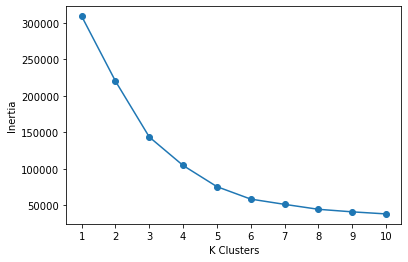

In [8]:
plt.plot(k,ssd, marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 6.

In [9]:
# 6 is selected as the optimal k value

In [10]:
model=KMeans(n_clusters=6)
model.fit(df)

KMeans(n_clusters=6)

In [11]:
model.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 4, 2, 4, 3,
       5, 2, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [12]:
model.n_iter_

3

In [13]:
output=df
output['Customer_groups']=model.labels_

In [14]:
output

,Genre,Age,Annual_Income_(k$),Spending_Score,Customer_groups
CustomerID,,,,,
1,1,19,15,39,5
2,1,21,15,81,2
3,0,20,16,6,5
4,0,23,16,77,2
5,0,31,17,40,5
...,...,...,...,...,...
196,0,35,120,79,1
197,0,45,126,28,0
198,1,32,126,74,1


### Selecting two important features for visualization of the cluster
Annual_Income_(k$) and Spending_Score are two important Features

In [15]:
df1=df[["Annual_Income_(k$)","Spending_Score"]]

F:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x1aa7dd54fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

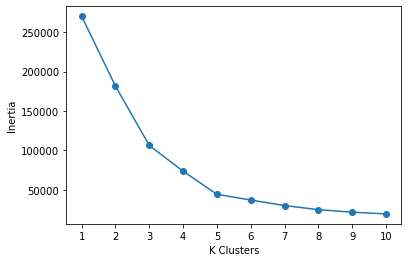

In [16]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df1)
    ssd.append(model.inertia_)
plt.plot(k,ssd, marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)

In [17]:
model=KMeans(n_clusters=5)
model.fit(df1)

KMeans(n_clusters=5)

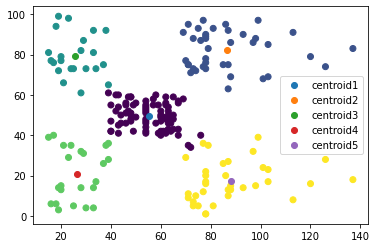

In [18]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=model.labels_)
centroid=model.cluster_centers_
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.legend()